In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import f1_score,recall_score, precision_score,accuracy_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('./Placement_Data_Full_Class.csv')

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:

dataset.drop(['salary','sl_no'],axis=1, inplace=True)

In [5]:
dataset.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
# missing values checking
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [8]:
# checking column values data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


# Label Encoding Data

In [9]:
# label encoding needs to be done to ensure all values in the dataset is numeric
# hsc_s, degree_t columns needs to be splitted into columns (get_dummies needs to be applied)
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)


In [10]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,0,1,0,1,0,0


In [11]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [12]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,Mkt&Fin,57.80,Placed,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,Mkt&HR,59.43,Not Placed,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,Mkt&Fin,55.50,Placed,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,Mkt&Fin,74.49,Placed,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,Mkt&Fin,53.62,Placed,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,Mkt&Fin,69.72,Placed,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,Mkt&HR,60.23,Placed,0,1,0,1,0,0


In [13]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc.

In [14]:
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])


In [15]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,1,0,1,0,1,0,0


In [16]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for Outliers

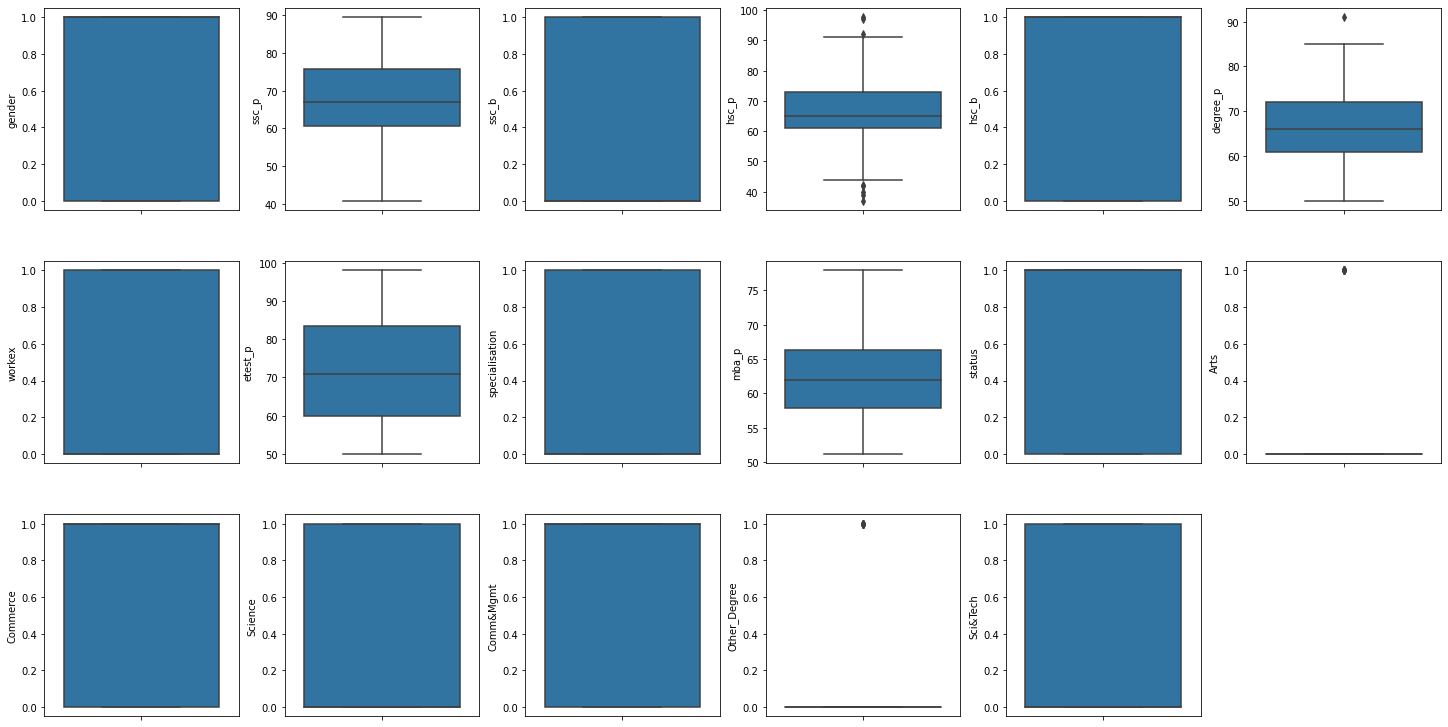

In [17]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) # for styling by giving padding

In [18]:
# deleting some outliers in 2 columns degree_p and hsc_p
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

# Checking for Correlation

In [19]:
dataset.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
gender,1.000000,-0.059818,0.017052,-0.022187,0.074438,-0.154679,0.093325,0.081765,-0.103355,-0.298466,0.098189,-0.096386,0.001870,0.041426,-0.036801,-0.096386,0.086960
ssc_p,-0.059818,1.000000,0.107995,0.528111,0.056672,0.528753,0.183073,0.264009,-0.177436,0.377438,0.605381,-0.194514,-0.093283,0.181772,-0.168282,-0.063459,0.208907
ssc_b,0.017052,0.107995,1.000000,-0.140332,0.608493,0.020828,-0.027916,-0.018739,-0.057356,0.074653,0.033717,-0.001410,-0.042586,0.043708,-0.078842,-0.001410,0.083707
hsc_p,-0.022187,0.528111,-0.140332,1.000000,-0.038259,0.443595,0.135144,0.208809,-0.222405,0.335610,0.499777,-0.074931,0.267073,-0.236466,0.121441,-0.132137,-0.061747
hsc_b,0.074438,0.056672,0.608493,-0.038259,1.000000,0.043618,0.039061,0.031316,0.004762,0.073936,0.009393,-0.114855,-0.069985,0.122407,-0.019492,-0.114855,0.077977
degree_p,-0.154679,0.528753,0.020828,0.443595,0.043618,1.000000,0.135100,0.226353,-0.232618,0.376261,0.479557,-0.153777,-0.005676,0.074850,-0.004369,-0.180476,0.094883
workex,0.093325,0.183073,-0.027916,0.135144,0.039061,0.135100,1.000000,0.052862,-0.187200,0.174951,0.279091,0.054259,-0.070916,0.047346,-0.118781,0.009501,0.120296
etest_p,0.081765,0.264009,-0.018739,0.208809,0.031316,0.226353,0.052862,1.000000,-0.222765,0.203663,0.122770,-0.073539,-0.023192,0.056508,-0.010486,0.009482,0.006296
specialisation,-0.103355,-0.177436,-0.057356,-0.222405,0.004762,-0.232618,-0.187200,-0.222765,1.000000,-0.100456,-0.251043,-0.080368,-0.126684,0.164258,-0.098640,0.090868,0.058387
mba_p,-0.298466,0.377438,0.074653,0.335610,0.073936,0.376261,0.174951,0.203663,-0.100456,1.000000,0.063197,0.009640,-0.040704,0.036839,-0.087109,-0.031441,0.107435


<AxesSubplot:>

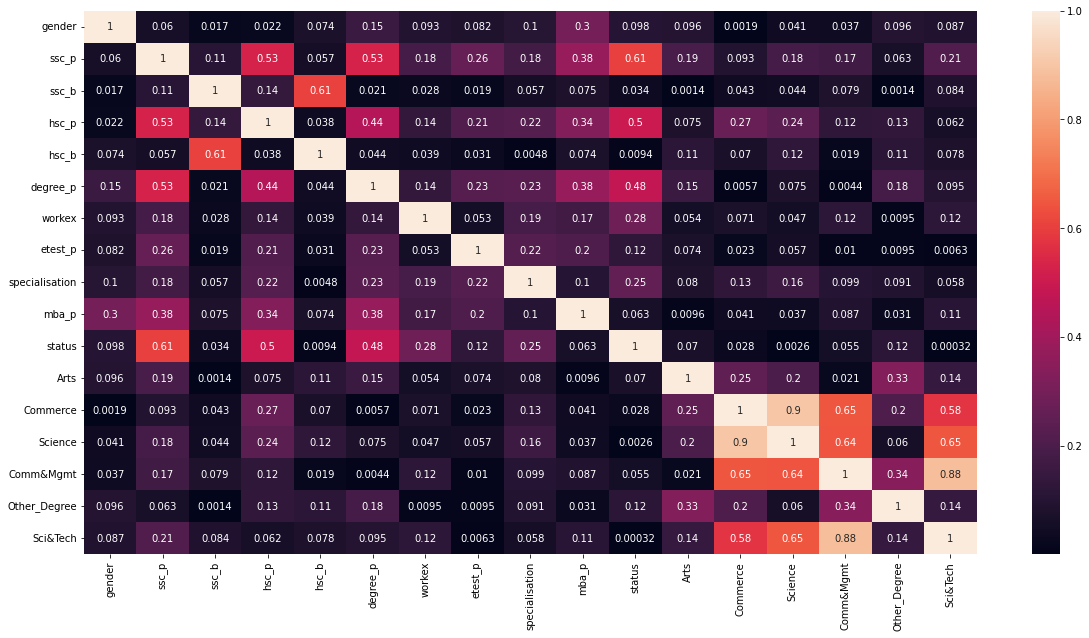

In [20]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

Correlation between the features are atmost 0.9 so they are not multi-correlated

In [21]:
dataset.shape

(212, 17)

C:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

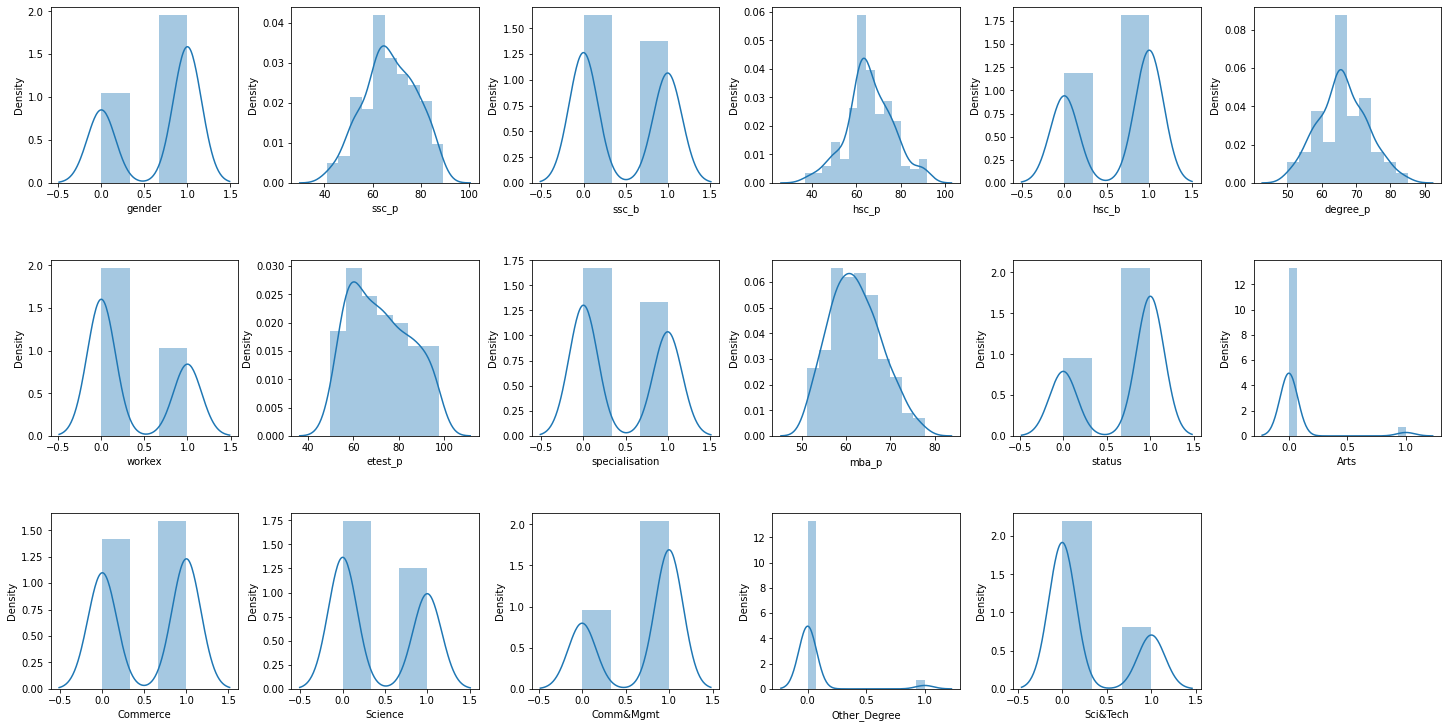

In [22]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [23]:
x = dataset.loc[:,dataset.columns!='status'] # all features are used
y = dataset.loc[:, 'status'] # label is status of placement

In [24]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,1,60.23,0,1,0,1,0,0


In [25]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 212, dtype: int32

In [26]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) # for standardising the features
x_scaled = pd.DataFrame(x_scaled)

In [27]:
x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.732279,-0.014324,1.088837,2.374790,0.810093,-1.147588,-0.724693,-1.290485,1.12041,-0.582035,-0.233937,0.944911,-0.850633,-1.455214,-0.233937,1.649029
1,0.732279,1.128266,-0.918411,1.166246,0.810093,1.600241,1.379895,1.106094,-0.89253,0.718506,-0.233937,-1.058301,1.175595,-1.455214,-0.233937,1.649029
2,0.732279,-0.199659,-0.918411,0.180906,-1.234427,-0.301234,-0.724693,0.231153,-0.89253,-0.755904,4.274661,-1.058301,-0.850633,0.687184,-0.233937,-0.606417
3,0.732279,-1.033667,-0.918411,-1.345275,-1.234427,-1.993942,-0.724693,-0.453584,1.12041,-0.472497,-0.233937,-1.058301,1.175595,-1.455214,-0.233937,1.649029
4,0.732279,1.727825,-0.918411,0.715069,-1.234427,1.010615,-0.724693,1.889738,-0.89253,-1.155803,-0.233937,0.944911,-0.850633,0.687184,-0.233937,-0.606417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.732279,1.245954,1.088837,1.516314,0.810093,1.617168,-0.724693,1.448463,-0.89253,2.145971,-0.233937,0.944911,-0.850633,0.687184,-0.233937,-0.606417
208,0.732279,-0.848332,1.088837,-0.582185,0.810093,0.827238,-0.724693,0.155071,-0.89253,-1.482677,-0.233937,-1.058301,1.175595,-1.455214,-0.233937,1.649029
209,0.732279,-0.014324,1.088837,0.085519,0.810093,0.968297,1.379895,-0.986158,-0.89253,1.316615,-0.233937,0.944911,-0.850633,0.687184,-0.233937,-0.606417
210,-1.365601,0.634349,1.088837,-0.009867,0.810093,-1.147588,-0.724693,-0.149257,1.12041,-0.333402,-0.233937,0.944911,-0.850633,0.687184,-0.233937,-0.606417


In [28]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2 ,random_state=0)

# Using Logistic Regression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [33]:
y_test

209    1
38     1
90     1
192    1
150    1
76     1
97     0
138    1
5      0
84     1
56     1
144    0
159    0
113    1
75     0
203    1
127    1
12     0
169    0
157    1
167    0
201    0
211    1
189    0
184    0
18     0
214    0
15     1
87     0
72     1
7      1
64     1
142    1
98     1
137    1
161    0
34     0
153    1
91     0
191    1
107    1
180    1
140    1
Name: status, dtype: int32

In [34]:
accuracy_score(y_test, y_pred)

0.8837209302325582

In [35]:
lr.score(x_train,y_train)

0.9112426035502958

In [36]:
confusion_matrix(y_test, y_pred)

array([[14,  3],
       [ 2, 24]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.89      0.92      0.91        26

    accuracy                           0.88        43
   macro avg       0.88      0.87      0.88        43
weighted avg       0.88      0.88      0.88        43



In [38]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
val=precision_score(y_test, y_pred)*100
print(val )

Precision: 0.889
88.88888888888889


In [39]:
print('Recall: %.3f' % recall_score(y_test, y_pred))
print(recall_score(y_test, y_pred)*100)

Recall: 0.923
92.3076923076923


In [40]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
x=accuracy_score(y_test, y_pred)*100
print(x )

Accuracy: 0.884
88.37209302325581


In [40]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.906


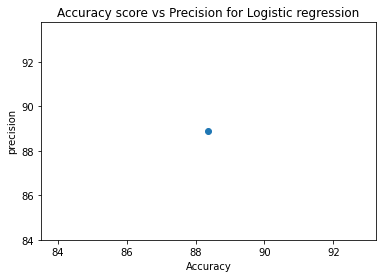

In [52]:
plt.title('Accuracy score vs Precision for Logistic regression')
plt.xlabel("Accuracy")
plt.ylabel('precision')
plt.scatter(x,val)
plt.show()

# Using Naive Bayes Classifier - Gaussian Naive Bayes

In [53]:
nbclassifier = GaussianNB()

In [54]:
nbclassifier.fit(x_train, y_train)

GaussianNB()

In [55]:
y_pred_nb = nbclassifier.predict(x_test)

In [56]:
accuracy_score(y_test, y_pred_nb)

0.8604651162790697

In [57]:
nbclassifier.score(x_train, y_train)

0.8520710059171598

In [58]:
confusion_matrix(y_test, y_pred_nb)

array([[13,  4],
       [ 2, 24]], dtype=int64)

In [59]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.86      0.92      0.89        26

    accuracy                           0.86        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.86      0.86      0.86        43



In [60]:
print('Precision: %.3f' % precision_score(y_test, y_pred_nb))

Precision: 0.857


In [61]:
print('Recall: %.3f' % recall_score(y_test, y_pred_nb))

Recall: 0.923


In [62]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_nb))

Accuracy: 0.860


# Using SVM Linear Kernel

In [63]:
clf = svm.SVC(kernel="linear")

In [64]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [65]:
y_pred_svm = clf.predict(x_test)

In [66]:
accuracy_score(y_test, y_pred_svm)

0.9069767441860465

In [67]:
clf.score(x_train, y_train)

0.8994082840236687

In [68]:
confusion_matrix(y_test, y_pred_svm)

array([[15,  2],
       [ 2, 24]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.92      0.92      0.92        26

    accuracy                           0.91        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



In [70]:
print('Precision: %.3f' % precision_score(y_test, y_pred_svm))

Precision: 0.923


In [71]:
print('Recall: %.3f' % recall_score(y_test, y_pred_svm))

Recall: 0.923


In [72]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_svm))

Accuracy: 0.907


In [73]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred_svm))

F1 Score: 0.923


In [74]:
#Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
#prediction
y_pred_dt = classifier.predict(x_test)#Accuracy

In [77]:
y_pred_dt

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [78]:
y_test

209    1
38     1
90     1
192    1
150    1
76     1
97     0
138    1
5      0
84     1
56     1
144    0
159    0
113    1
75     0
203    1
127    1
12     0
169    0
157    1
167    0
201    0
211    1
189    0
184    0
18     0
214    0
15     1
87     0
72     1
7      1
64     1
142    1
98     1
137    1
161    0
34     0
153    1
91     0
191    1
107    1
180    1
140    1
Name: status, dtype: int32

In [79]:
accuracy_score(y_test,y_pred_dt)

0.8837209302325582

In [80]:
classifier.score(x_train,y_train)

1.0

In [81]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  2],
       [ 3, 23]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.92      0.88      0.90        26

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43



In [83]:
print('Precision: %.3f' % precision_score(y_test, y_pred_dt))

Precision: 0.920


In [84]:
print('Recall: %.3f' % recall_score(y_test, y_pred_dt))

Recall: 0.885


In [85]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_dt))

Accuracy: 0.884


In [86]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred_dt))

F1 Score: 0.902


In [87]:
import sys
!{sys.executable} -m pip install xgboost

You should consider upgrading via the 'C:\python\python.exe -m pip install --upgrade pip' command.


In [88]:
# Create Decision Tree classifer object
#classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)# Train Decision Tree Classifer
#classifier = classifier.fit(x_train,y_train)#Predict the response for test dataset
#y_pred_dt = classifier.predict(x_test)# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",accuracy_score(y_test, y_pred_dt))

In [89]:
#XgBoost

In [90]:
from xgboost import XGBClassifier

In [91]:
model = XGBClassifier()

In [92]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
#y_test

In [94]:
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train) 


Target on train data [1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0]


In [95]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  1.0


In [96]:
# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 


Target on test data [1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 1]


In [97]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.8372093023255814


In [98]:
print('Precision: %.3f' % precision_score(y_test, predict_test))

Precision: 0.880


In [99]:
print('Recall: %.3f' % recall_score(y_test, predict_test))

Recall: 0.846


In [100]:
print('Accuracy: %.3f' % accuracy_score(y_test, predict_test))

Accuracy: 0.837


In [101]:
print('F1 Score: %.3f' % f1_score(y_test, predict_test))

F1 Score: 0.863
